In [1]:
import pandas as pd


In [2]:
# Load your datasets
fear_greed_df = pd.read_csv(r"C:\Users\shaur\Desktop\fear_greed_index.csv")
historical_data_df = pd.read_csv(r"C:\Users\shaur\Desktop\historical_data.csv")

In [3]:
fear_greed_df.head(6)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
5,1517895000,8,Extreme Fear,2018-02-06


In [4]:
historical_data_df.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:

fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], format='%Y-%m-%d')

historical_data_df['Timestamp IST'] = pd.to_datetime(historical_data_df['Timestamp IST'], format='%d-%m-%Y %H:%M')


historical_data_df['date'] = historical_data_df['Timestamp IST'].dt.date
historical_data_df['date'] = pd.to_datetime(historical_data_df['date'])  # match dtype with fear_greed_df


print("Fear & Greed Sample:")
print(fear_greed_df[['date', 'classification']].head())

print("\nTrader Data Sample:")
print(historical_data_df[['Timestamp IST', 'date']].head())


Fear & Greed Sample:
        date classification
0 2018-02-01           Fear
1 2018-02-02   Extreme Fear
2 2018-02-03           Fear
3 2018-02-04   Extreme Fear
4 2018-02-05   Extreme Fear

Trader Data Sample:
        Timestamp IST       date
0 2024-12-02 22:50:00 2024-12-02
1 2024-12-02 22:50:00 2024-12-02
2 2024-12-02 22:50:00 2024-12-02
3 2024-12-02 22:50:00 2024-12-02
4 2024-12-02 22:50:00 2024-12-02


In [6]:

merged_df = pd.merge(historical_data_df, fear_greed_df[['date', 'classification']], on='date', how='left')

print(merged_df[['date', 'classification', 'Closed PnL', 'Side']].head())


        date classification  Closed PnL Side
0 2024-12-02  Extreme Greed         0.0  BUY
1 2024-12-02  Extreme Greed         0.0  BUY
2 2024-12-02  Extreme Greed         0.0  BUY
3 2024-12-02  Extreme Greed         0.0  BUY
4 2024-12-02  Extreme Greed         0.0  BUY


In [7]:

avg_pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)
print("Average Profit (Closed PnL) by Sentiment:")
print(avg_pnl_by_sentiment)


Average Profit (Closed PnL) by Sentiment:
classification
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Name: Closed PnL, dtype: float64


In [8]:

trade_count_by_sentiment = merged_df['classification'].value_counts()
print("\nNumber of Trades by Sentiment:")
print(trade_count_by_sentiment)



Number of Trades by Sentiment:
classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


In [9]:

buy_sell_pnl = merged_df.groupby(['classification', 'Side'])['Closed PnL'].mean().unstack()
print("\nAvg Profit: BUY vs SELL by Sentiment:")
print(buy_sell_pnl)



Avg Profit: BUY vs SELL by Sentiment:
Side                  BUY        SELL
classification                       
Extreme Fear    34.114627   34.980106
Extreme Greed   10.498927  114.584643
Fear            63.927104   45.049641
Greed           25.002302   59.691091
Neutral         29.227429   39.456408


C:\Users\shaur\AppData\Local\Temp\ipykernel_13952\513219956.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette="coolwarm")


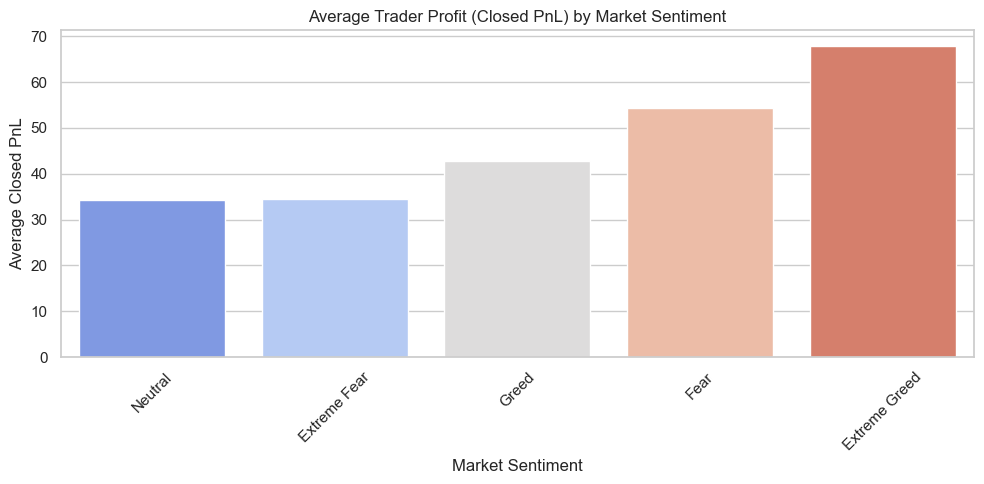

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

avg_pnl = merged_df.groupby("classification")["Closed PnL"].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette="coolwarm")
plt.title("Average Trader Profit (Closed PnL) by Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\shaur\AppData\Local\Temp\ipykernel_13952\1246121579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trade_counts.index, y=trade_counts.values, palette="viridis")


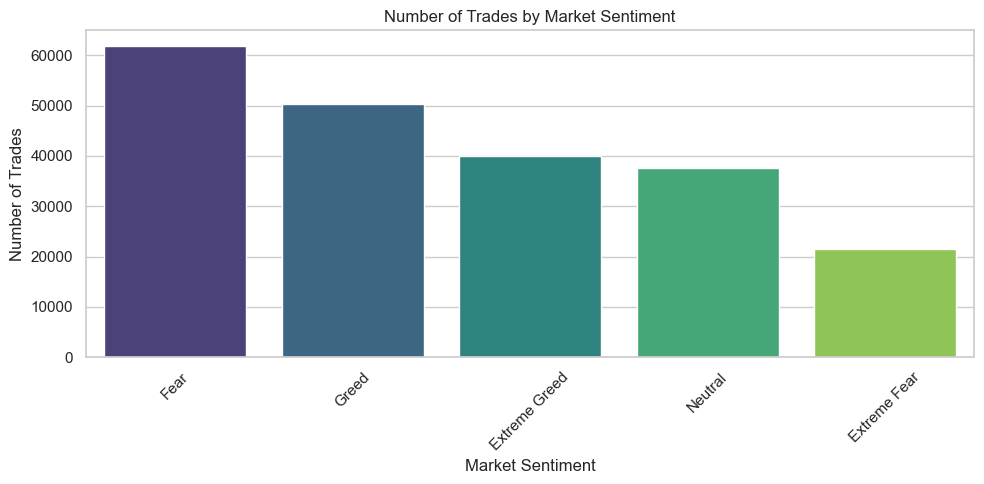

In [11]:
trade_counts = merged_df["classification"].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=trade_counts.index, y=trade_counts.values, palette="viridis")
plt.title("Number of Trades by Market Sentiment")
plt.ylabel("Number of Trades")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


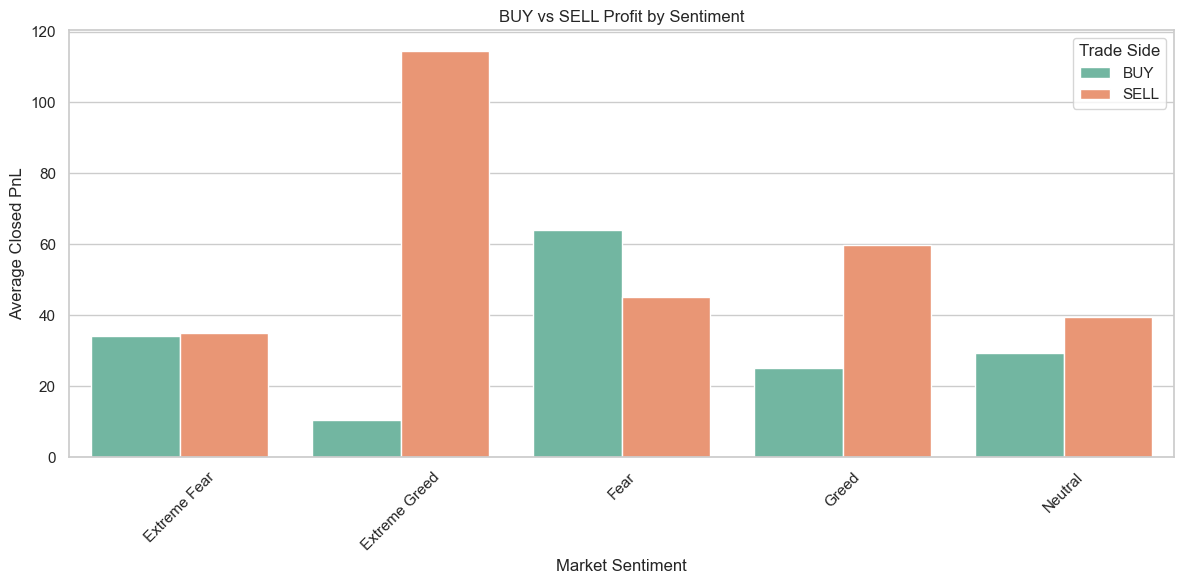

In [12]:
buy_sell_pnl = merged_df.groupby(['classification', 'Side'])['Closed PnL'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=buy_sell_pnl, x="classification", y="Closed PnL", hue="Side", palette="Set2")
plt.title("BUY vs SELL Profit by Sentiment")
plt.ylabel("Average Closed PnL")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.legend(title="Trade Side")
plt.tight_layout()
plt.show()


In [13]:

merged_df['PnL_Status'] = merged_df['Closed PnL'].apply(lambda x: 'Profit' if x > 0 else 'Loss')


merged_df['Trade_Size'] = merged_df['Size USD'].apply(lambda x: 'Big' if x > 1000 else 'Small')



merged_df['Leverage_Estimate'] = merged_df.apply(
    lambda row: (row['Size USD'] / (row['Execution Price'] * row['Size Tokens']))
    if row['Execution Price'] > 0 and row['Size Tokens'] > 0 else 0,
    axis=1
)


sentiment_mapping = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}
merged_df['Sentiment_Label'] = merged_df['classification'].map(sentiment_mapping)

# Show result
merged_df[['Closed PnL', 'PnL_Status', 'Trade_Size', 'Leverage_Estimate', 'classification', 'Sentiment_Label']].head()


,Closed PnL,PnL_Status,Trade_Size,Leverage_Estimate,classification,Sentiment_Label
0,0.0,Loss,Big,1.000000,Extreme Greed,4.0
1,0.0,Loss,Small,1.000000,Extreme Greed,4.0
2,0.0,Loss,Big,0.999999,Extreme Greed,4.0
3,0.0,Loss,Big,1.000001,Extreme Greed,4.0
4,0.0,Loss,Small,1.000036,Extreme Greed,4.0


In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Select features for ML
features = ['Size USD', 'Execution Price', 'Leverage_Estimate', 'Sentiment_Label']
X = merged_df[features]

# Target variable: 1 if profit, 0 if loss
y = merged_df['PnL_Status'].apply(lambda x: 1 if x == 'Profit' else 0)

# Split into training and testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

print("🧾 Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
